In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rt = pd.read_csv('RtMzInt_RAW/Filter_01_rt.csv')
rt.head()

,Unnamed: 0,x
0,F01.S0001,0.341282
1,F01.S0003,0.824948
2,F01.S0005,1.203666
3,F01.S0007,1.582343
4,F01.S0009,1.960129


In [4]:
rt.memory_usage()

Index            80
Unnamed: 0    34928
x             34928
dtype: int64

In [49]:
f = open('RtMzInt_RAW/Filter_03_int.txt')

In [50]:
count = 0
while True:
    l = f.readline()
    if not l:
        print('end')
        break
    i = 0
    if 'x' in l:
        count += 1
    i += 1
print(count)

end
4370


In [67]:
f = open('RtMzInt_RAW/Filter_01_rt.csv')

In [68]:
from collections import Counter

d = Counter()
pivot = 0
while True:
    l = f.readline()
    if not l: break
        
    if 'x' in l:
        pivot += 1
    d[pivot] += 1
d           

Counter({1: 4367})

In [74]:
f.close()

In [76]:
f.closed

True

In [240]:
mzs = open('RtMzInt_RAW/Filter_1_mz.txt')
ints = open('RtMzInt_RAW/Filter_1_int.txt')
rts = open('RtMzInt_RAW/Filter_1_rt.csv')

In [204]:
r = rts.readline()

In [206]:
round(float(re.findall('".*?",(.*)\n', r)[0]), 5)

0.82495

In [159]:
import re

In [232]:
c = Counter()
l = []
pivot = 0
while True:
    line = ints.readline()
    if not line:
        c[pivot] = max(c[pivot])
        break
    if 'x' in line:
        pivot += 1
        c[pivot] = []
        if pivot > 1:
            c[pivot-1] = max(c[pivot-1])
    else:
        c[pivot].append(round(float(re.findall('".*?" (.*)\n', line)[0]), 2))

In [241]:
c = Counter()
l = []
pivot = 0
while True:
    line = ints.readline()
    if not line:
        c[pivot] = sum(c[pivot])
        break
    if 'x' in line:
        pivot += 1
        c[pivot] = []
        if pivot > 1:
            c[pivot-1] = sum(c[pivot-1])
    else:
        c[pivot].append(round(float(re.findall('".*?" (.*)\n', line)[0]), 2))

In [234]:
c[4365]

273194368.0

<Figure size 864x360 with 0 Axes>

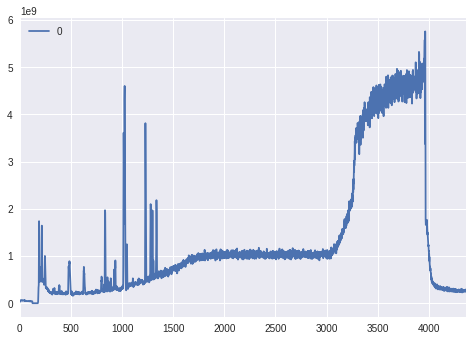

In [235]:
plt.figure(figsize=(12,5))
pd.DataFrame(list(zip(*c.items()))[1]).plot()

In [210]:
i = 0
r = []
while True:
    l = rts.readline()
    if not l: break
        
    if 'F' in l:
        r.append(round(float(re.findall('".*?",(.*)\n', l)[0]), 5))

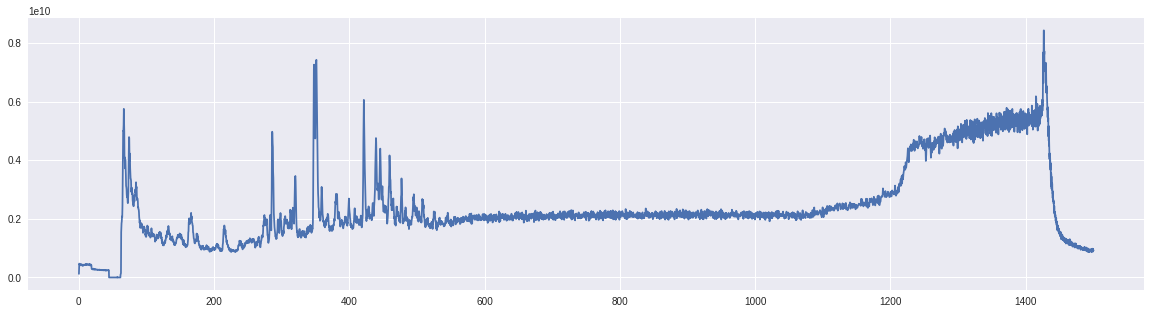

In [243]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
plt.plot(r, list(zip(*c.items()))[1])

(0, 1500)

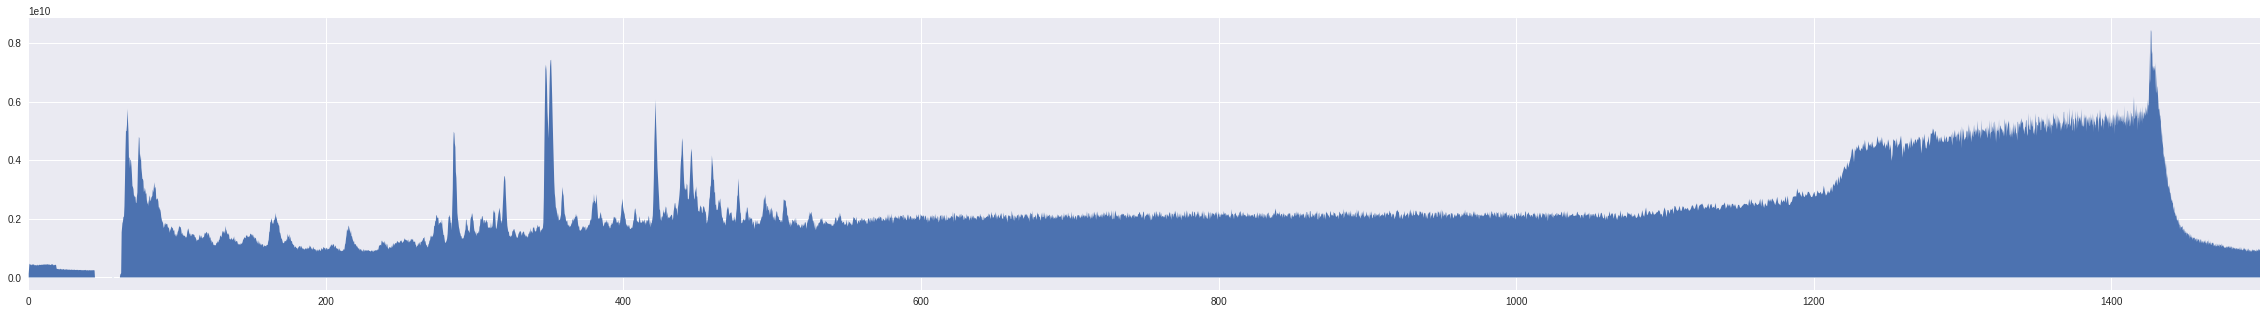

In [256]:
plt.style.use('seaborn')
plt.figure(figsize=(40,5))
plt.fill_between(r, list(zip(*c.items()))[1])
plt.xlim(0,1500)

In [238]:
plt.fill_between?

Signature: plt.fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*, *y2*). This
creates one or multiple polygons describing the filled area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly. Use *step* if
the filling should be a step function, i.e. constant in between *x*.


Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, optional, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional, default: None
    Define *where* to exclude some horizontal regions from being
    filled. The filled regions are defined by the coordin

In [218]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            15G        3.1G         10G        385M        1.4G         11G
Swap:           30G          0B         30G


In [226]:
!echo "123qwe" | sudo -S sh -c "echo 3 > /proc vm/drop_caches"

[sudo] password for prz: sh: 1: cannot create /proc: Is a directory
